In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
#from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/farming/SF/Data-processed/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,73,55,42,20.879744,82.002744,6.502985,202.935536,rice
1,100,43,44,21.770462,80.319644,7.038096,226.655537,rice
2,91,46,41,23.004459,82.320763,7.840207,263.964248,rice
3,67,40,43,26.491096,80.158363,6.980401,242.864034,rice
4,60,60,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2295,88,33,32,26.774637,66.413269,6.780064,177.774507,coffee
2296,98,23,35,27.417112,56.636362,6.086922,127.924610,coffee
2297,84,27,28,24.131797,67.225123,6.362608,173.322839,coffee
2298,113,33,35,26.272418,52.127394,6.758793,127.175293,coffee
2299,90,29,34,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

18400

In [6]:
df.shape

(2300, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'mungbean', 'maize', 'lentil', 'jute', 'coffee', 'cotton',
       'kidneybeans', 'mothbeans', 'coconut', 'blackgram', 'pigeonpeas',
       'chickpea', 'banana', 'grapes', 'apple', 'mango', 'muskmelon',
       'orange', 'papaya', 'pomegranate', 'watermelon'], dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

label
coffee         200
rice           100
chickpea       100
pomegranate    100
papaya         100
orange         100
muskmelon      100
mango          100
apple          100
grapes         100
banana         100
pigeonpeas     100
mungbean       100
blackgram      100
coconut        100
mothbeans      100
kidneybeans    100
cotton         100
jute           100
lentil         100
maize          100
watermelon     100
Name: count, dtype: int64

In [11]:
numeric_df = df.drop('label', axis=1)  # Exclude the non-numeric column
correlation_matrix = numeric_df.corr()

Non-numeric columns: Index(['label'], dtype='object')


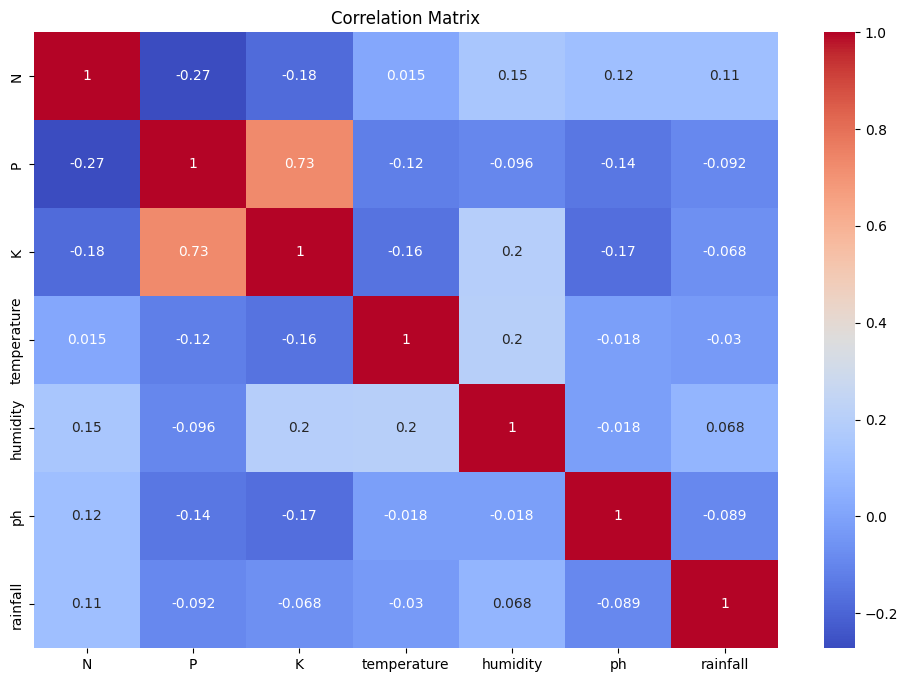

In [12]:
# Step 1: Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_columns)

# Step 2: Drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)

# Step 3: Calculate the correlation matrix for numeric columns
correlation_matrix = df_numeric.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Separating features and target label

In [13]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [14]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [15]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTree's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTree's Accuracy is:  92.3913043478261
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        16
   blackgram       0.70      1.00      0.82        16
    chickpea       1.00      0.97      0.98        29
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        45
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        17
        jute       1.00      0.17      0.29        18
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.59      1.00      0.75        19
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        17
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00  

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross-validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [19]:
score

array([0.92826087, 0.92608696, 0.91956522, 0.91304348, 0.92826087])

### Saving the trained Decision Tree model

In [20]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'C:/farming/SF/models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Gaussian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.991304347826087
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        16
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        45
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        17
        jute       0.82      1.00      0.90        18
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        19
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00  

In [22]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99782609, 0.99782609, 0.99347826, 0.99130435, 0.99130435])

### Saving the trained Gaussian Naive Bayes model

In [23]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'C:/farming/SF/models/NaiveBayes.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing database
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9847826086956522
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        16
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        24
      coffee       1.00      0.98      0.99        45
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        17
        jute       0.75      1.00      0.86        18
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      1.00      0.97        19
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.0

In [25]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98043478, 0.98478261, 0.99130435, 0.98695652, 0.98478261])

In [26]:
#Saving the trained SVM model

In [27]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'C:/farming/SF/models/SVM.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9782608695652174
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        16
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        24
      coffee       0.98      1.00      0.99        45
      cotton       0.88      0.88      0.88        17
      grapes       1.00      1.00      1.00        17
        jute       0.86      1.00      0.92        18
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.89      0.94        19
       maize       0.95      0.90      0.93        21
       mango       1.00      1.00      1.00        17
   mothbeans       0.95      0.95      0.95        19
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00   

In [29]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95869565, 0.96086957, 0.95      , 0.96304348, 0.96521739])

### Saving trained Logistic Regression model

In [30]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'C:/farming/SF/models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9891304347826086
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        16
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        45
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        17
        jute       0.86      1.00      0.92        18
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.90      1.00      0.95        19
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00

In [32]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99782609, 0.99565217, 0.99565217, 0.99130435, 0.98913043])

### Saving trained Random Forest model

In [33]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'C:/farming/SF/models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

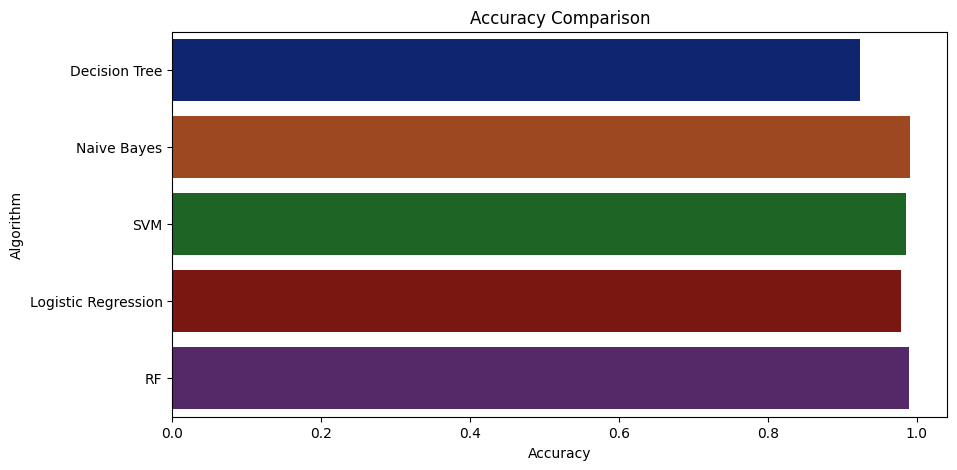

In [34]:
#Accuracy plot
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [35]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9239130434782609
Naive Bayes --> 0.991304347826087
SVM --> 0.9847826086956522
Logistic Regression --> 0.9782608695652174
RF --> 0.9891304347826086


## Making a prediction

In [36]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [37]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']
